# Damage Calculation

This notebook shows a general calculation stream for a nominal damage calculation.

1. Define load cycles
2. Define the material parameter
3. Select the damage calculation method (Miner elementary, Miner-Haibach, ...)
4. Calculate the damage for every load level and the damage sum


In [1]:
import numpy as np
import pandas as pd
import pylife.strength.fatigue
import plotly.express as px

### 1. Define load cycles


In [2]:
load_cycles = pd.DataFrame(
    {
        "amplitude": [100, 50, 75, 25],
        "cycles": [1e3, 5e3, 10e3, 25e3],
    }
)

In [3]:
load_cycles

,amplitude,cycles
0,100,1000.0
1,50,5000.0
2,75,10000.0
3,25,25000.0


<Axes: ylabel='cycles'>

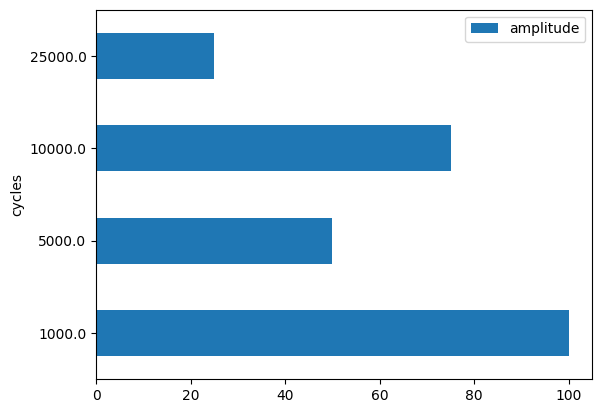

In [4]:
load_cycles.plot.barh(x="cycles", y="amplitude")

## 2. Define the material parameter


In [ ]:
k_1 = 8
mat = pd.Series(
    {
        "k_1": k_1,
        # 'k_2' : 2 * k_1 - 1,
        "ND": 1.0e6,
        "SD": 100.0,
        "TN": 12.0,
        "TS": 1.1,
    }
)
display(mat.to_frame().T)

### Damage Calculation

Now we can calculate the damage for every loadstep and summarize this damage to get the total damage.


In [ ]:
damage = {
    "miner_original": mat.fatigue.damage(load_cycles),
    "miner_elementary": mat.fatigue.miner_elementary().damage(load_cycles),
    "miner_haibach": mat.fatigue.miner_haibach().damage(load_cycles),
}
pr_out = [
    print("total damage sum " + k + " :  %.2e" % v.sum()) for k, v in damage.items()
]

#### Plot the damage vs collectives


In [ ]:
cyc = np.logspace(1, 12, 200)
fig = px.bar(
    load_cycles, x="cycles", y="amplitude", orientation="h", log_x=True, log_y=True
)
for method, k_2 in zip(damage.keys(), [-np.inf, k_1, 2 * k_1 - 1]):
    mat_act = mat.copy()
    mat_act["k_2"] = k_2
    wc = mat_act.woehler
    sn_df = pd.DataFrame({"cycles": cyc, "amplitude": wc.basquin_load(cyc)})
    fig.add_scatter(x=sn_df.cycles, y=sn_df.amplitude, name=method)
fig.show()